Learning transfer and data augmentation.
Currently, the best performing models in the field of machine learning are neural networks with a large number of parameters, as can be seen in some of the models available in Keras (Keras). For example, the ChatGPT model is estimated to have more than 175 billion parameters. These types of models require large amounts of data and computational resources to train, which may be difficult to achieve for some. It is estimated that Microsoft invested around $3 billion in building the ChatGPT model (source: New York Times).

This presents a problem in the context of data scientists, since they often do not have access to large amounts of data or the computational infrastructure necessary to train deep models. However, there are alternatives that can accommodate moderate amounts of data and require fewer computational resources, making them more accessible and effective for many. These alternatives are two: Transfer Learning and Data Augmentation.

I invite you to analyze this code that implements transfer learning and data augmentation in solving a two-class classification problem. Specifically, the Cats vs Dogs database is used.

## Stage 1: Data loading

In [14]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [17]:
classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']
trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)



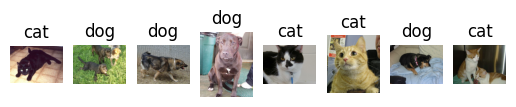

In [18]:
i = 0
fig, ax = plt.subplots(1, 8)
for image, label in testDataset.take(8):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1
plt.show()

## Stage 2: Data Pre-Processing

Now, the data is normalized so that the images take values in the interval (0,1)

In [19]:
def preprocess(img, label):
    return tf.image.resize(img, [150, 150]) / 255, label

In [20]:
trainDataset, testDataset = trainDataset.map(preprocess).batch(32), testDataset.map(preprocess).batch(32)

## Stage 3: Definition of the model by transfer of learning

The transfer learning technique consists of taking advantage of a previously trained model and adapting it to our specific learning problem. This way, a smaller amount of data is required to train the model, which reduces the risk of overfitting and decreases computational resource requirements.

In [21]:
# First, the pre-trained model is loaded. It is a VGG16 architecture, which
# was trained on the Imagenet database. Note that the argument is set
# include_top=False, this removes the last layer of the network, which is related
# with the learning task for which it was trained.

# In this way, we must design only the last layers in order for them to be
# adapt to our application, in this case, a classification with 2 classes.
# Additionally, the input_shape argument must be set to match the
# size of our images.

# In conclusion, this network has more than 14 million parameters. However,
# we will not train all these parameters, but only those of the
# layers that we design. Clearly this reduces the amount of resources needed.
# computational and the amount of data.
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))


In [23]:
# As we have said, we are not going to train all the parameters of the network,
# for this, we must tell the model that the parameters of the base model are
# will be left in their current form.
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [24]:
# Now, we must design the upper layers of the network, so that they are
# those appropriate for the proposed learning task.
model = keras.Sequential([
    base_model, # starts from the base model.

    # Some layers are added for the learning task. At this point I don't know
    # usually uses convolutional layers, only dense and pooling layers.
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    # the last layer must correspond to the learning task. In this sense,
    # since we have a 2 class classification problem, we use one layer
    # with one unit and with Sigmoid activation.
    keras.layers.Dense(1, activation='sigmoid')#Output layer
])

In [25]:
# The model is compiled using the ADAM optimizer, a cost function is set
# based on cross entropy and performance is evaluated in terms of accuracy.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Of the 16 million parameters that this network has, only they will be trained
# 2 millions. This means a significant reduction in the amount of data and
# consequently on computational resources.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Ahora se compila, entrena y evalúa el modelo definido por transfer learning.

Epoch 1/15
509/509 [==============================] - 71s 105ms/step - loss: 0.3086 - accuracy: 0.8686 - val_loss: 0.2175 - val_accuracy: 0.9084
Epoch 2/15
509/509 [==============================] - 58s 113ms/step - loss: 0.2358 - accuracy: 0.9006 - val_loss: 0.2142 - val_accuracy: 0.9093
Epoch 3/15
509/509 [==============================] - 57s 112ms/step - loss: 0.2091 - accuracy: 0.9145 - val_loss: 0.2076 - val_accuracy: 0.9123
Epoch 4/15
509/509 [==============================] - 51s 101ms/step - loss: 0.1925 - accuracy: 0.9194 - val_loss: 0.2099 - val_accuracy: 0.9153
Epoch 5/15
509/509 [==============================] - 51s 101ms/step - loss: 0.1801 - accuracy: 0.9272 - val_loss: 0.2105 - val_accuracy: 0.9097
Epoch 6/15
509/509 [==============================] - 57s 111ms/step - loss: 0.1728 - accuracy: 0.9285 - val_loss: 0.2060 - val_accuracy: 0.9159
Epoch 7/15
509/509 [==============================] - 52s 103ms/step - loss: 0.1602 - accuracy: 0.9328 - val_loss: 0.2102 - val_ac

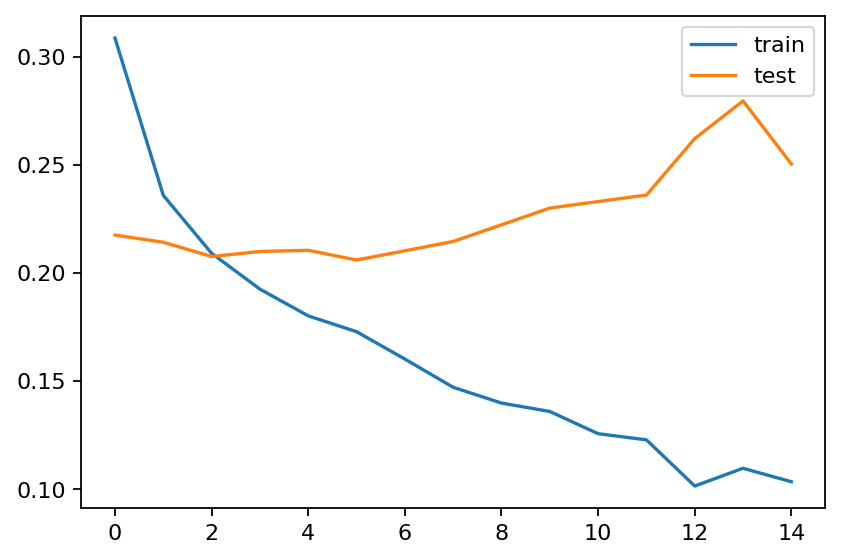

In [26]:
# The model is trained using mini-batches of size 32, and the optimization process
# runs for 15 epochs. (takes about 15 minutes)
history = model.fit(trainDataset, epochs=15, batch_size=32, validation_data=testDataset)

plt.figure(figsize=(6, 4), dpi=160)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

When analyzing the graphs of the cost function, it can be seen that the model is experiencing the phenomenon of over-training (overfitting). Despite having decreased the number of parameters that must be optimized, the number of these parameters is still considerably higher than the amount of training data available

## 4. Data Augmentation

To solve the problem of overtraining, there are different strategies such as dropout and regularization. Another alternative is to generate synthetic images that correspond to alterations of the images in the training set.

In [27]:
# First, the images are rescaled to have a size of 150x150
trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)
size = (150, 150)
trainDataset = trainDataset.map(lambda x, y: (tf.image.resize(x, size), y)).batch(32)
testDataset = testDataset.map(lambda x, y: (tf.image.resize(x, size), y)).batch(32)

In [28]:
# A model is defined to perform data augmentation
data_augmentation = tf.keras.Sequential([
  # make random orientation changes
  keras.layers.RandomFlip("horizontal"),
  # Rotate images randomly
  keras.layers.RandomRotation(0.1),
])


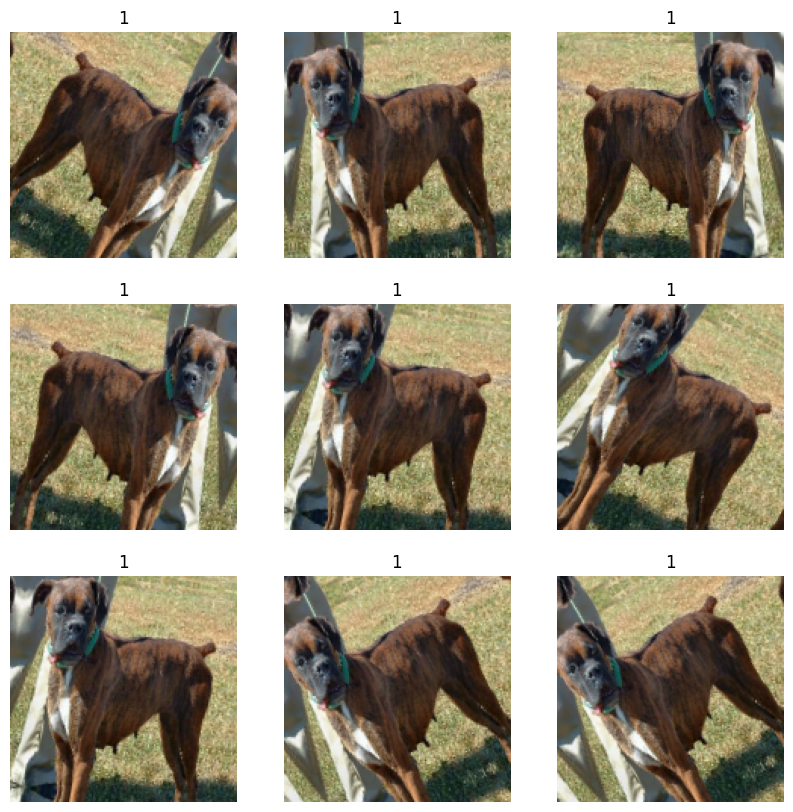

In [29]:
# Some images are displayed
import numpy as np

for images, labels in trainDataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

In [30]:
# The network is modified in order to use the increased data.
model_DA = keras.Sequential([
# The function responsible for data augmentation is added
    data_augmentation,
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model_DA.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model_DA.fit(trainDataset,
          epochs=15,
          batch_size=32,
          validation_data=testDataset) #takes about 20 minutes

Epoch 1/15
509/509 [==============================] - 62s 119ms/step - loss: 0.9543 - accuracy: 0.8909 - val_loss: 0.1965 - val_accuracy: 0.9347
Epoch 2/15
509/509 [==============================] - 59s 115ms/step - loss: 0.2076 - accuracy: 0.9191 - val_loss: 0.1169 - val_accuracy: 0.9560
Epoch 3/15
509/509 [==============================] - 53s 105ms/step - loss: 0.1948 - accuracy: 0.9252 - val_loss: 0.1284 - val_accuracy: 0.9516
Epoch 4/15
509/509 [==============================] - 59s 116ms/step - loss: 0.1855 - accuracy: 0.9285 - val_loss: 0.1233 - val_accuracy: 0.9533
Epoch 5/15
509/509 [==============================] - 52s 103ms/step - loss: 0.1675 - accuracy: 0.9329 - val_loss: 0.1181 - val_accuracy: 0.9583
Epoch 6/15
509/509 [==============================] - 58s 113ms/step - loss: 0.1749 - accuracy: 0.9362 - val_loss: 0.1279 - val_accuracy: 0.9584
Epoch 7/15
509/509 [==============================] - 52s 101ms/step - loss: 0.1641 - accuracy: 0.9351 - val_loss: 0.1337 - val_ac

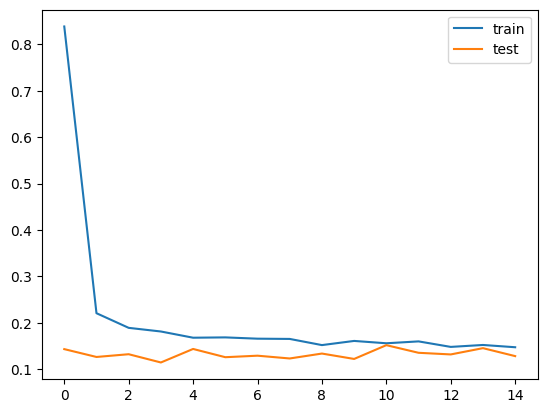

In [ ]:
plt.plot(history1.history["loss"], label="train")
plt.plot(history1.history["val_loss"], label="test")
plt.legend()
plt.show()

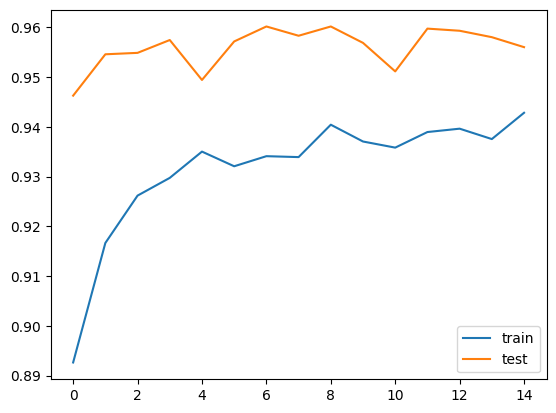

In [ ]:
plt.plot(history1.history['accuracy'], label="train")
plt.plot(history1.history['val_accuracy'], label="test")
plt.legend()
plt.show()

#4. Conclusion.

Data augmentation and transfer learning are two key elements for any data scientist. They allow us to take full advantage of the modeling capacity of deep neural networks in situations where labeled data is scarce and when economic resources are not sufficient to have powerful computational infrastructures that allow training models with hundreds of millions of parameters.

Transfer learning allows us to use pre-trained models in our tasks, which reduces the number of parameters that must be estimated and, therefore, the amount of data needed for training and computational requirements.

On the other hand, data augmentation allows synthetic data to be generated from the training data, which increases the size of the training set and decreases the risk of overfitting.